In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [ ]:
df = pd.read_csv('/content/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df['average'] = (df['math score']+df['reading score']+df['writing score'])/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [ ]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df['gender']= le.fit_transform(df['gender'])
# df['race/ethnicity'] = le.fit_transform(df['race/ethnicity'])
# df['parental level of education'] = le.fit_transform(df['parental level of education'])
# df['lunch'] = le.fit_transform(df['lunch'])
# df['test preparation course'] = le.fit_transform(df['test preparation course'])
# df.head()

In [ ]:
gender ={
    'female' : 0,
    'male' : 1
}

In [ ]:
df['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [ ]:
race = {
    'group A' : 0,
    'group B' : 1, 
    'group C' : 2,
    'group D' : 3,
    'group E' : 4


}

In [ ]:
df['race/ethnicity'] = df['race/ethnicity'].replace(race).astype("int64")

In [ ]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [ ]:
parents = {
    "some college" : 0,
    "associate's degree" : 1,
    "high school" : 2,
    "some high school" : 3,
    "bachelor's degree" : 4,
    "master's degree" : 5

}

In [ ]:
df['parental level of education'] = df['parental level of education'].replace(parents).astype("int64")

In [ ]:
df['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [ ]:
lunch = {
    'standard': 0,
    'free/reduced' : 1
}

In [ ]:
df['lunch']= df['lunch'].replace(lunch).astype("int64")

In [ ]:
df['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

In [ ]:
test ={
    'none': 0,
    'completed': 1
}

In [ ]:
df['test preparation course'] = df['test preparation course'].replace(test).astype("int64")

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,0,1,4,0,0,72,72,74,72.666667
1,0,2,0,0,1,69,90,88,82.333333
2,0,1,5,0,0,90,95,93,92.666667
3,1,0,1,1,0,47,57,44,49.333333
4,1,2,0,0,0,76,78,75,76.333333


In [ ]:
df['gender'] = df['gender'].map(gender)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,0,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,0,group C,some college,standard,completed,69,90,88,82.333333
2,0,group B,master's degree,standard,none,90,95,93,92.666667
3,1,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,1,group C,some college,standard,none,76,78,75,76.333333


In [ ]:
df['gender'].value_counts()

0    518
1    482
Name: gender, dtype: int64

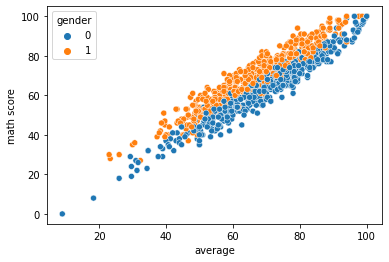

In [ ]:
import seaborn as sns
sns.scatterplot(x=df['average'],y=df['math score'], hue=df['gender'])

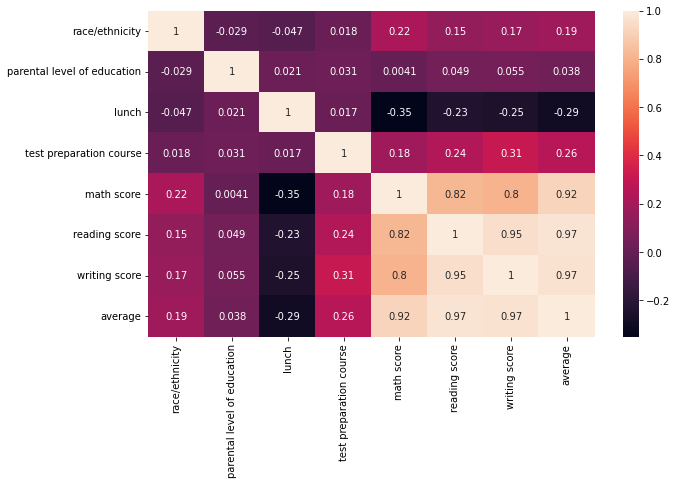

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.iloc[:,1:10].corr(), annot=True)

In [ ]:
df.info()


In [ ]:
df['average'] = df['average'].astype("int64")

In [ ]:
x = df.drop(['average'], axis=1)
y = df['average']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2
                                                 )

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       1000 non-null   int64
 1   race/ethnicity               1000 non-null   int64
 2   parental level of education  1000 non-null   int64
 3   lunch                        1000 non-null   int64
 4   test preparation course      1000 non-null   int64
 5   math score                   1000 non-null   int64
 6   reading score                1000 non-null   int64
 7   writing score                1000 non-null   int64
 8   average                      1000 non-null   int64
dtypes: int64(9)
memory usage: 70.4 KB


In [ ]:
# def models (x_train, y_train):
#   # 1. LogisticRegression
#   # from sklearn.linear_model import LogisticRegression
#   # logistic = LogisticRegression()
#   # logistic.fit(x_train, y_train)

#   # RandomForest
#   from sklearn.ensemble import RandomForestRegressor
#   forest = RandomForestRegressor()
#   forest.fit(x_train, y_train)

#    # DecisionTreeClassifier
#   from sklearn.tree import DecisionTreeClassifier
#   tree= DecisionTreeClassifier(random_state=0, criterion = 'entropy')
#   tree.fit(x_train, y_train)

  
#    #4 KNeighbors Classifier
#   from sklearn.neighbors import KNeighborsClassifier 
#   neighbors = KNeighborsClassifier()
#   neighbors.fit(x_train, y_train)

    
#    #5 xgboots 
#   from xgboost import XGBClassifier 
#   xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.5, max_depth = 5, n_estimators = 180)
#   xgb.fit(x_train, y_train)


#   # print(logistic.score(x_train, y_train))
#   print(forest.score(x_train,y_train))
#   print(tree.score(x_train,y_train))
#   print(neighbors.score(x_train,y_train))
#   print(xgb.score(x_train,y_train))
#   return forest, tree, neighbors, xgb



In [ ]:
rmse = []
mae = []
r2 = []
model_names = []

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

le = LinearRegression()
forest= RandomForestRegressor()
gbr = GradientBoostingRegressor()
neighbors =KNeighborsRegressor()

models = [le,forest,gbr,neighbors]

for i in models:
  i.fit(x_train,y_train)
  y_pred =i.predict(x_test)
  rmse.append(round(np.sqrt(mean_squared_error(y_test,y_pred)),2))
  mae.append(round(np.sqrt(mean_absolute_error(y_test,y_pred)),2))
  r2.append(round(r2_score(y_test,y_pred), 2))
  
  print(f'model: {i} and rmse score is: {round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)}, mae score is: {round(np.sqrt(mean_absolute_error(y_test, y_pred)), 2)} r2_score is: {round(r2_score(y_test, y_pred), 2)}')

model_names = ['LinearRegression','RandomForestRegressor', 'GradientBoostRegressor', 'KNeighborsRegressor']

result_df = pd.DataFrame({'RMSE': rmse, 'MAE': mae, 'R2_SCORE': r2}, index = model_names)
result_df


model: LinearRegression() and rmse score is: 0.28, mae score is: 0.49 r2_score is: 1.0
model: RandomForestRegressor() and rmse score is: 0.78, mae score is: 0.76 r2_score is: 1.0
model: GradientBoostingRegressor() and rmse score is: 0.63, mae score is: 0.69 r2_score is: 1.0
model: KNeighborsRegressor() and rmse score is: 0.73, mae score is: 0.73 r2_score is: 1.0


,RMSE,MAE,R2_SCORE
LinearRegression,0.28,0.49,1.0
RandomForestRegressor,0.78,0.76,1.0
GradientBoostRegressor,0.63,0.69,1.0
KNeighborsRegressor,0.73,0.73,1.0
